# Treadmill Dataset Analysis 

### Importing Important Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('trademill.csv')
df.head()

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
0,TM1,18,Male,14.0,Single,3,4,29562,NaN
1,TM1,19,Male,15.0,Single,2,3,31836,75.0
2,TM1,19,Female,14.0,Partnered,4,3,30699,66.0
3,TM1,19,Male,12.0,Single,3,3,32973,85.0
4,TM1,20,Male,13.0,Partnered,4,2,35247,47.0


### Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          180 non-null    object 
 1   Age              180 non-null    int64  
 2   Gender           169 non-null    object 
 3   Education        176 non-null    float64
 4   Marital Status   180 non-null    object 
 5   Treadmill Usage  180 non-null    int64  
 6   Fitness Level    180 non-null    int64  
 7   Salary           180 non-null    int64  
 8   Miles            175 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.8+ KB


In [4]:
df['Product'].unique()

array(['TM1', 'TM2', 'TM3'], dtype=object)

In [5]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
df['Marital Status'].unique()

array(['Single', 'Partnered'], dtype=object)

In [7]:
df['Treadmill Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [8]:
df['Fitness Level'].unique()


array([4, 3, 2, 1, 5], dtype=int64)

In [9]:
df.describe()

,Age,Education,Treadmill Usage,Fitness Level,Salary,Miles
count,180.000000,176.000000,180.000000,180.000000,180.000000,175.000000
mean,28.788889,15.585227,3.455556,3.311111,53719.577778,103.577143
std,6.943498,1.626076,1.084797,0.958869,16506.684226,52.477620
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,120.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Dealing with missing value 

In [10]:
df.isnull().sum()

Product             0
Age                 0
Gender             11
Education           4
Marital Status      0
Treadmill Usage     0
Fitness Level       0
Salary              0
Miles               5
dtype: int64

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [12]:
df['Miles'].fillna(df['Miles'].mean(), inplace=True)

In [13]:
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

Product            0
Age                0
Gender             0
Education          0
Marital Status     0
Treadmill Usage    0
Fitness Level      0
Salary             0
Miles              0
dtype: int64

In [15]:
df.head()

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
0,TM1,18,Male,14.0,Single,3,4,29562,103.577143
1,TM1,19,Male,15.0,Single,2,3,31836,75.000000
2,TM1,19,Female,14.0,Partnered,4,3,30699,66.000000
3,TM1,19,Male,12.0,Single,3,3,32973,85.000000
4,TM1,20,Male,13.0,Partnered,4,2,35247,47.000000


### Checking for outliers

#### **As Data is really less, so will use the percentile method

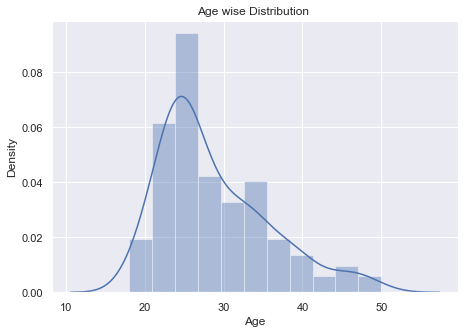

In [98]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age']).set(title ='Age wise Distribution ')
plt.show()


<AxesSubplot:xlabel='Age'>

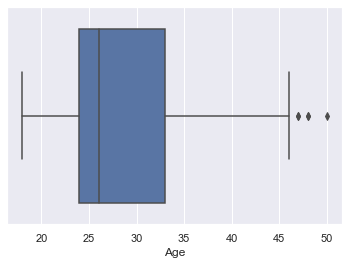

In [17]:
#outliers for Age
sns.boxplot(df['Age'])

In [18]:
#outliers for age
upper_limit = df['Age'].quantile(0.99)
lower_limit = df['Age'].quantile(0.01)
print(upper_limit)
print(lower_limit)

48.0
19.0


In [19]:
df[df['Age'] < lower_limit]
#outliers are not very far from boundary of outliers, will not be considered as outlier(data has less rows too)

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
0,TM1,18,Male,14.0,Single,3,4,29562,103.577143


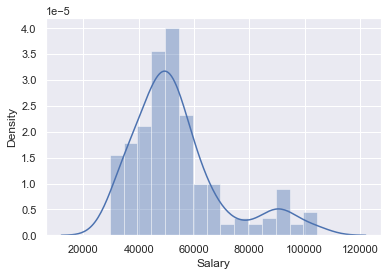

In [20]:
plt.subplot(1,1,1)
sns.distplot(df['Salary'])
plt.show()

In [21]:
#outliers for salary
upper_limit = df['Salary'].quantile(0.99)
lower_limit = df['Salary'].quantile(0.01)
print(upper_limit)
print(lower_limit)

103597.45000000001
31597.23


In [22]:
df[(df['Salary'] > 103597.45000000001) | (df['Salary'] < 31597.23)]
#There are too many outliers, will not be considered as outlier(data has less rows too)

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
0,TM1,18,Male,14.0,Single,3,4,29562,103.577143
2,TM1,19,Female,14.0,Partnered,4,3,30699,66.000000
174,TM3,38,Male,18.0,Partnered,5,5,104581,150.000000
178,TM3,47,Male,18.0,Partnered,4,5,104581,120.000000


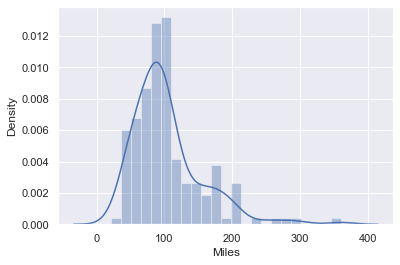

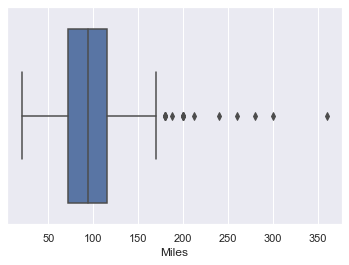

In [23]:
#outliers for Miles
plt.subplot(1,1,1)
sns.distplot(df['Miles'])
plt.show()
sns.boxplot(df['Miles'])
plt.show()

In [24]:

upper_limit = df['Miles'].quantile(0.99)
lower_limit = df['Miles'].quantile(0.01)
print(upper_limit)
print(lower_limit)

284.20000000000016
38.0


In [25]:
df[(df['Miles'] > 284.20000000000016) | (df['Miles'] < 38)]

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
117,TM2,31,Female,18.0,Single,2,1,65220,21.0
166,TM3,29,Male,14.0,Partnered,7,5,85906,300.0
173,TM3,35,Male,16.0,Partnered,4,5,92131,360.0


In [26]:
#Removing the too much farther outlier( Data has less rows so can't remove the nearest outliers)
df = df[df.Miles != 360]

In [27]:
df.describe()

,Age,Education,Treadmill Usage,Fitness Level,Salary,Miles
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,28.754190,15.592179,3.452514,3.301676,53504.988827,102.144613
std,6.947307,1.613199,1.087070,0.953142,16299.266148,48.172134
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43774.500000,70.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58251.500000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,300.000000


### EDA (Plotting the graphs)


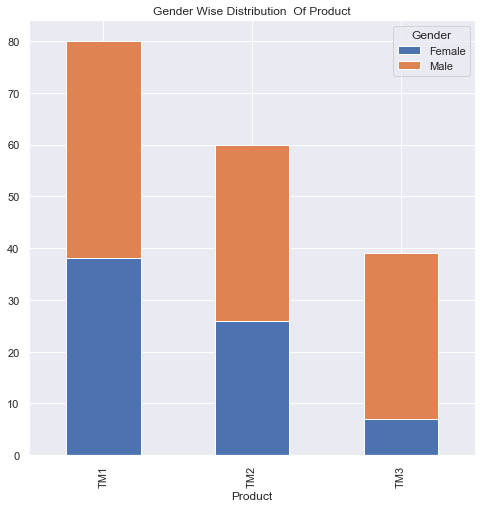

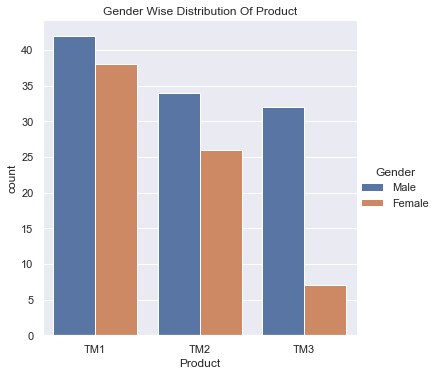

In [101]:
pd.crosstab(df['Product'], df['Gender']).plot(kind='bar', stacked=True).set(title = "Gender Wise Distribution  Of Product")
sns.catplot(x = 'Product', hue = 'Gender', kind = 'count', data = df).set(title = "Gender Wise Distribution Of Product")

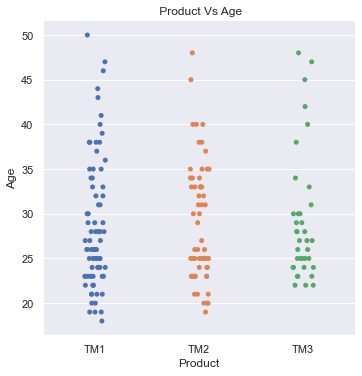

In [67]:
sns.set(rc={'figure.figsize':(8,8)})
sns.catplot(x="Product", y="Age", data=df).set(title = " Product Vs Age")
#Plot shows that after an age of 40 most people prefer TM1

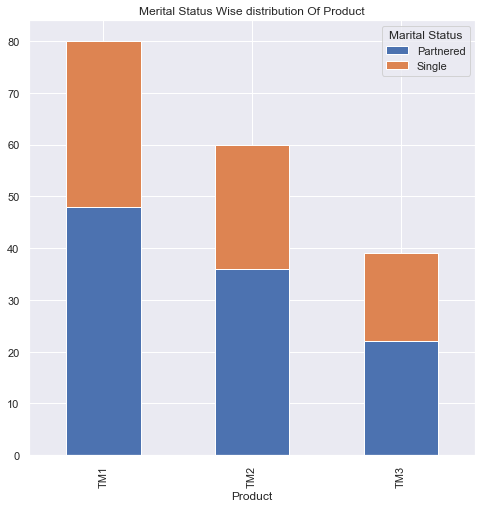

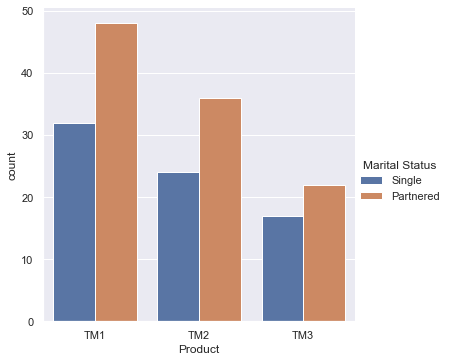

In [102]:
pd.crosstab(df['Product'], df['Marital Status']).plot(kind='bar', stacked=True).set(title = "Merital Status Wise distribution Of Product")
sns.catplot(x = 'Product', hue = 'Marital Status', kind = 'count', data = df)

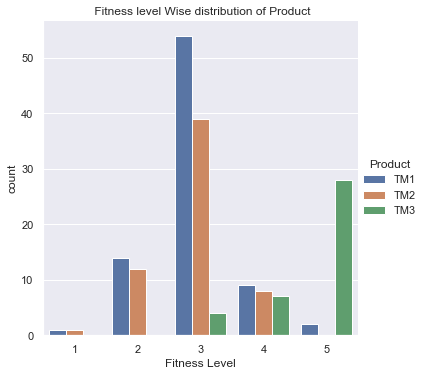

In [94]:
sns.catplot(x = 'Fitness Level', hue = 'Product', kind = 'count', data = df).set(title = " Fitness level Wise distribution of Product")

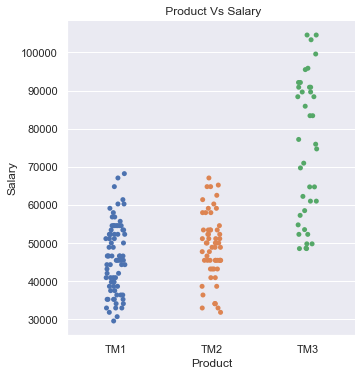

In [68]:
sns.catplot(x="Product", y="Salary", data=df).set(title = " Product Vs Salary")
#Plot shows the People with higher salary prefer TM3, also shows that TM3 is expensive, so must have better 
#features but people with lower salary choose Tm1 more than Tm2 but not by a lot difference

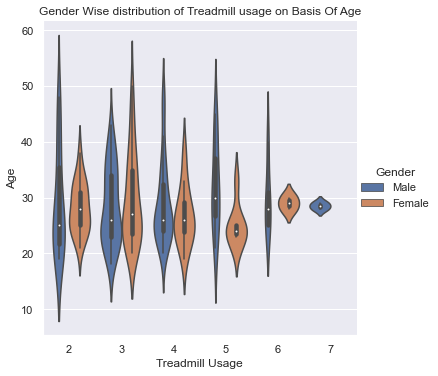

In [96]:
#sns.catplot(x="Treadmill Usage", y="Age", data=df)
g = sns.catplot(y="Age", x="Treadmill Usage", hue="Gender",
                data=df, kind="violin").set(title = "Gender Wise distribution of Treadmill usage on Basis Of Age")
#Female mostly use treadmill intensively are below 30 

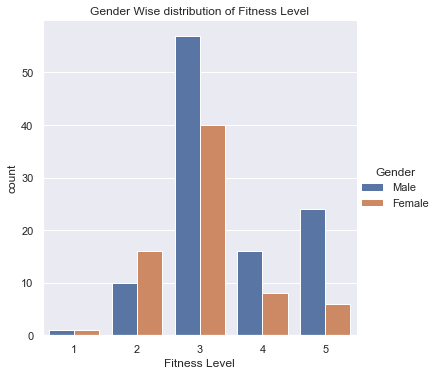

In [104]:
sns.catplot(x = 'Fitness Level', hue = 'Gender', kind = 'count', data = df).set(title = "Gender Wise distribution of Fitness Level")
# Males have better fitness than Females

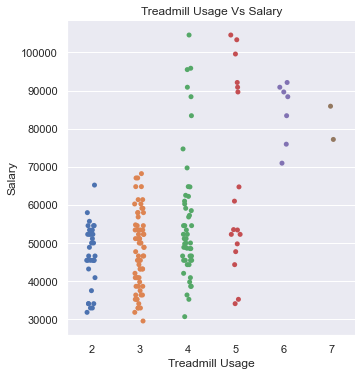

In [71]:
sns.catplot(x="Treadmill Usage", y="Salary", data=df).set(title = "Treadmill Usage Vs Salary")
# higher salary people try using 4-7 time, while lower salary people uses 2-5 times 

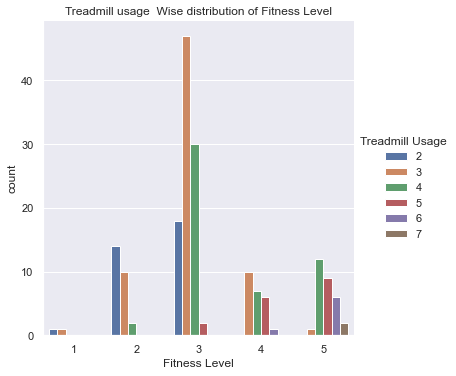

In [105]:
sns.catplot(x = 'Fitness Level', hue = 'Treadmill Usage', kind = 'count', data = df).set(title = "Treadmill usage  Wise distribution of Fitness Level")

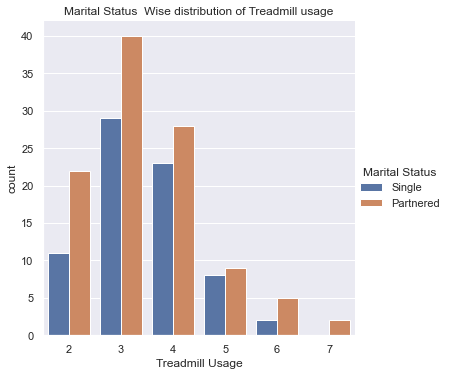

In [106]:
sns.catplot(x="Treadmill Usage",kind ='count', hue="Marital Status", data=df).set(title = "Marital Status  Wise distribution of Treadmill usage")

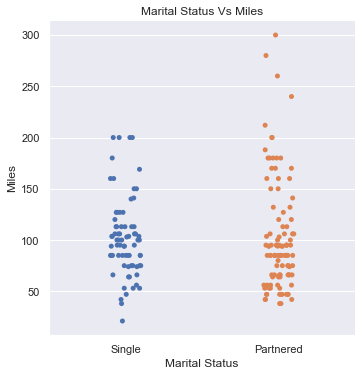

In [72]:
sns.catplot(x="Marital Status", y="Miles", data=df).set(title = "Marital Status Vs Miles")

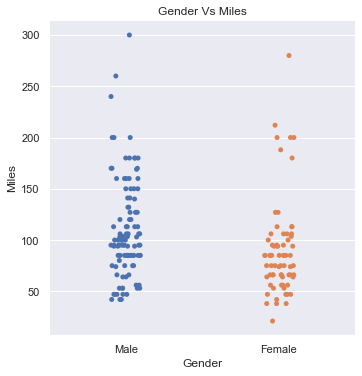

In [73]:
sns.catplot(x="Gender", y="Miles", data=df).set(title = "Gender Vs Miles")
#only men runs more than 125 miles, very few women 125 miles

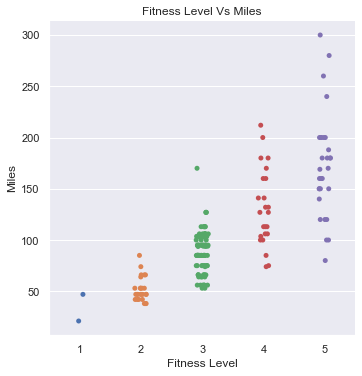

In [93]:
sns.catplot(x="Fitness Level", y="Miles", data=df).set(title = "Fitness Level Vs Miles")
#we can easily see that users who run more mile per weak have higher fitless level

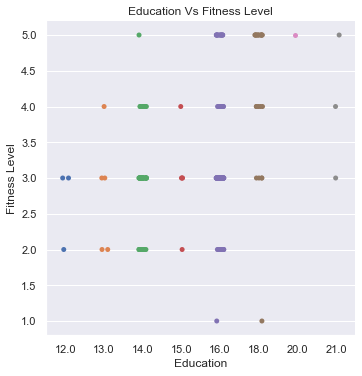

In [74]:
sns.catplot(x="Education", y="Fitness Level", data=df).set(title = "Education Vs Fitness Level")

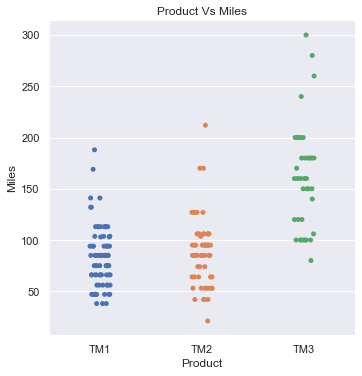

In [75]:
sns.catplot(x="Product", y="Miles", data=df).set(title = "Product Vs Miles")
#People buy Tm3 because they tends to run more than average

#  

[Text(0.5, 1.0, 'Gender Wise Distribution of Treadmill Users')]

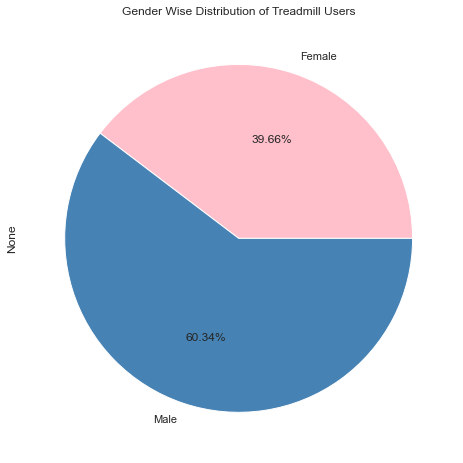

In [77]:
colors = ['pink', 'steelblue']

df.groupby('Gender').size().plot(kind='pie', autopct='%.2f%%', colors = colors).set(title = "Gender Wise Distribution of Treadmill Users")

[Text(0.5, 1.0, 'Product Wise Distribution of Treadmill Users')]

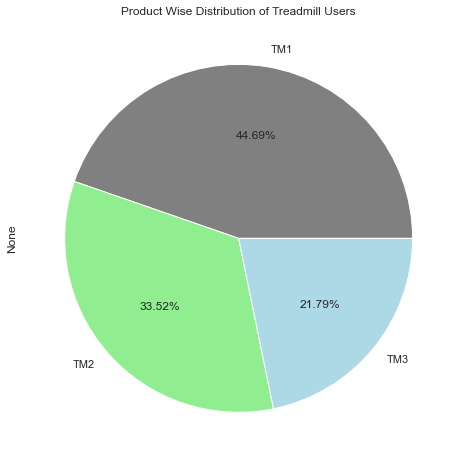

In [79]:
colors = ['grey', 'lightgreen', 'lightblue']

df.groupby('Product').size().plot(kind='pie', autopct='%.2f%%', colors = colors).set(title = "Product Wise Distribution of Treadmill Users")
# around 45 % use the Tm1, and  33% Tm2, and rest Tm3

[Text(0.5, 1.0, 'Merital Status Wise Distribution of Treadmill Users')]

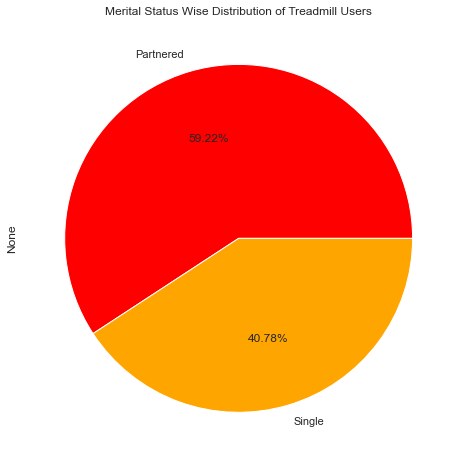

In [81]:
df.groupby('Marital Status').size().plot(kind='pie', autopct='%.2f%%', colors = ['red', 'orange']).set(title = "Merital Status Wise Distribution of Treadmill Users")

[Text(0.5, 1.0, 'Education Wise Distribution of Treadmill Users')]

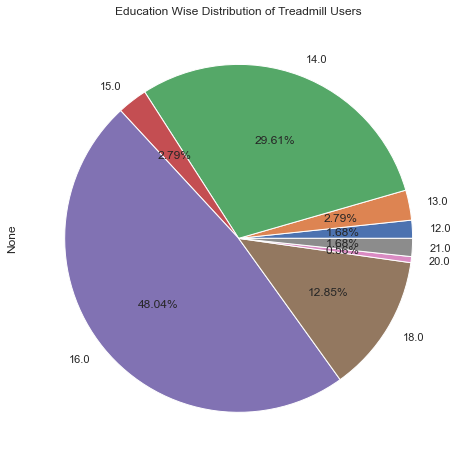

In [83]:
df.groupby('Education').size().plot(kind='pie', autopct='%.2f%%').set(title = "Education Wise Distribution of Treadmill Users")
# we can see about 80% users have education in range 14-16 yrs. It means that users  who are atleast graduated mostly use TM.
# You can sponsor college annual fest or other events  to advertise your product among target users

[Text(0.5, 1.0, 'Fitness Level Wise Distribution of Treadmill Users')]

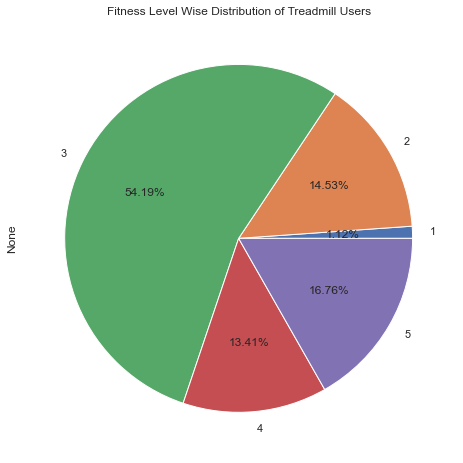

In [85]:
df.groupby('Fitness Level').size().plot(kind='pie', autopct='%.2f%%').set(title = "Fitness Level Wise Distribution of Treadmill Users")

[Text(0.5, 1.0, 'Treadmill Usage wise Distribution of Treadmill Users')]

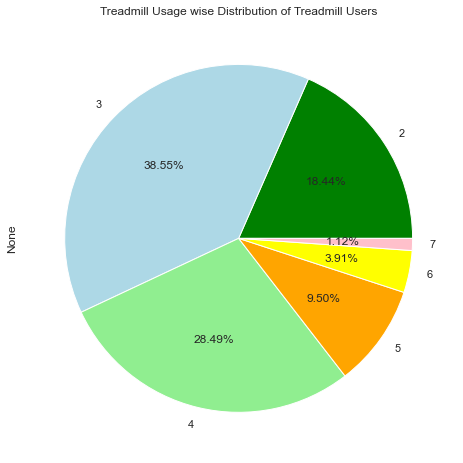

In [87]:
df.groupby('Treadmill Usage').size().plot(kind='pie', autopct='%.2f%%', colors = ['green', 'lightblue', 'lightgreen', 'orange', 'yellow', 'pink']).set(title = "Treadmill Usage wise Distribution of Treadmill Users")

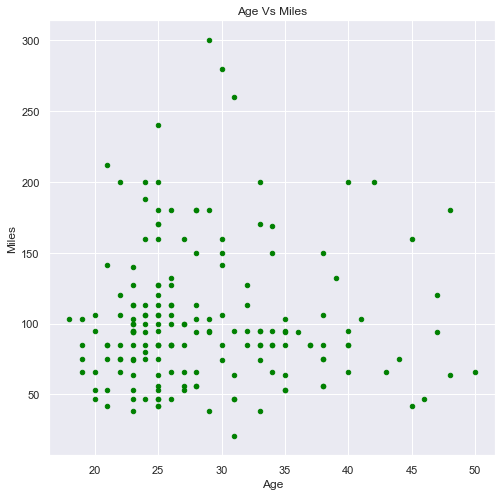

In [88]:

ax2 = df.plot.scatter(x='Age', y='Miles', c = 'green').set(title = "Age Vs Miles")
#younger people tends to run more miles than older people and also uses the treadmill more times

[Text(0.5, 1.0, 'Fitness Level Vs Age')]

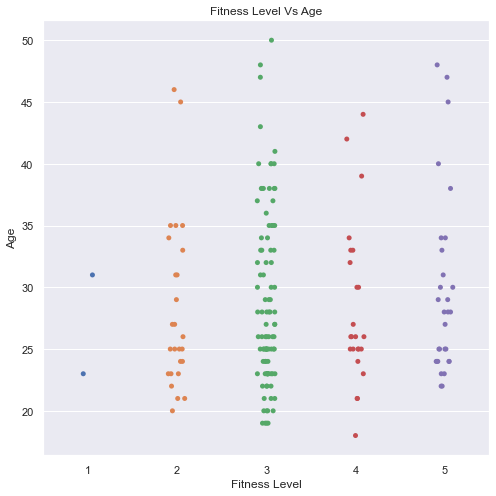

In [89]:
sns.stripplot(x="Fitness Level", y="Age", data=df).set(title = "Fitness Level Vs Age")


[Text(0.5, 1.0, 'Gender Vs Age')]

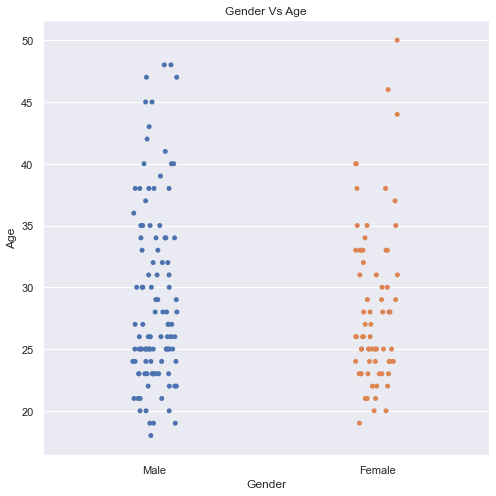

In [91]:
sns.stripplot(x="Gender", y="Age", data=df).set(title = "Gender Vs Age")
#Gives an understanding that After an age of 35 more males use on treadmill that females

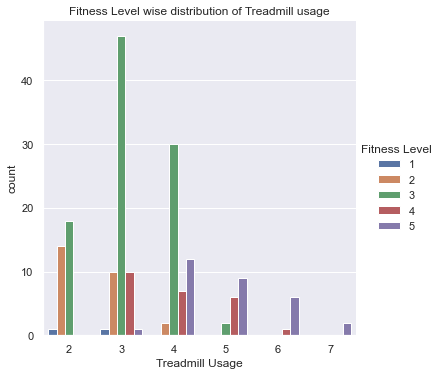

In [107]:
sns.catplot(x = 'Treadmill Usage', hue = 'Fitness Level', kind = 'count', data = df).set(title = "Fitness Level wise distribution of Treadmill usage")
#plot shows, people who use treadmill most of the times, have more possibility of being fit, 
#but using treadmill keeps you fit also, most people use treadmill 2-4 times(3 times most)

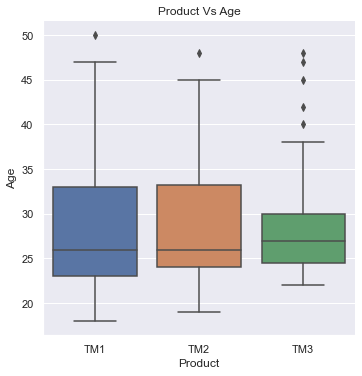

In [92]:
sns.catplot(x="Product", y="Age", kind="box", data=df).set(title = "Product Vs Age")

#  Some insights from the analysis

- After the age of 40, most people prefer TM1

- Users who have excellent fitness levels prefer TM3 while those who have average fitness levels prefer TM1, TM2

- Pople with a higher salary(>70000)  mostly prefer expensive products.

- Females mostly use treadmills intensively and are below 30

- Male have better fitness levels than female

- Higher salary people try using 4-7 times in a week, while lower or average salary people use 2-5 times in a week.

- Users who run more miles per weak have a higher fitness level

- People buy Tm3 because they tend to run more than average

- 60% of males use treadmills while 40% of females use the treadmill

- Around 45 % use  Tm1, and  33% Tm2, and the rest Tm3

- Partnered people are more fitness conscious than single

- Approx 80% of users have 14-16 yrs of education

- 55% of users have an intermediate fitness level

- Younger people tend to run more miles than older people and also use the treadmill more times

- After the age of 35 more males use treadmills than females




# Recommendation to stakeholders

- As we have seen that 80% of users have 14-16 yrs of education. You can sponsor any events for corporate companies to reach 
  out to potential customers. 

- You can give some discount(5-10%) to increase the sales of TM3.

- As we can see, higher salary people mostly use TM3, so you can promote TM3 in areas like shopping malls and cities where
  corporate employee lives.

- We can target the audience in college, such as IIM's, or IIT's to sponsor social cultural events.

- In advertise campaigns, we can focus on couples.

- We can increase campaigning for women, as there is less extensive use of treadmill by women.

